In [16]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel('lektsiia6_keis_zadanie.xlsx')
df = df.drop(df.columns[[3, 4]], axis=1)
# Извлечение номера месяца из даты
df['Поколение'] = pd.to_datetime(df['месяц открытия счёта']).dt.month
# Попроще обозначим столбец, а то питон плохо обрабатывал запрос, когда там был №
df.columns.values[1]='день'

# Группировка данных по номеру поколения
cohort_data = df.groupby('Поколение')



max_users_per_cohort = cohort_data['кол-во активных клиентов'].max()

In [17]:
df['Доля активных клиентов'] = df.apply(lambda row: row['кол-во активных клиентов'] / max_users_per_cohort[row['Поколение']], axis=1)


In [18]:
max_retention = df.groupby('Поколение')['Доля активных клиентов'].min()
print(max_retention)



Поколение
1    0.705378
2    0.659646
3    0.650414
4    0.672973
5    0.653812
6    0.652229
Name: Доля активных клиентов, dtype: float64


Видно, что наилучший разультат у первого поколения и равен 0.705 от первоначального кол-ва


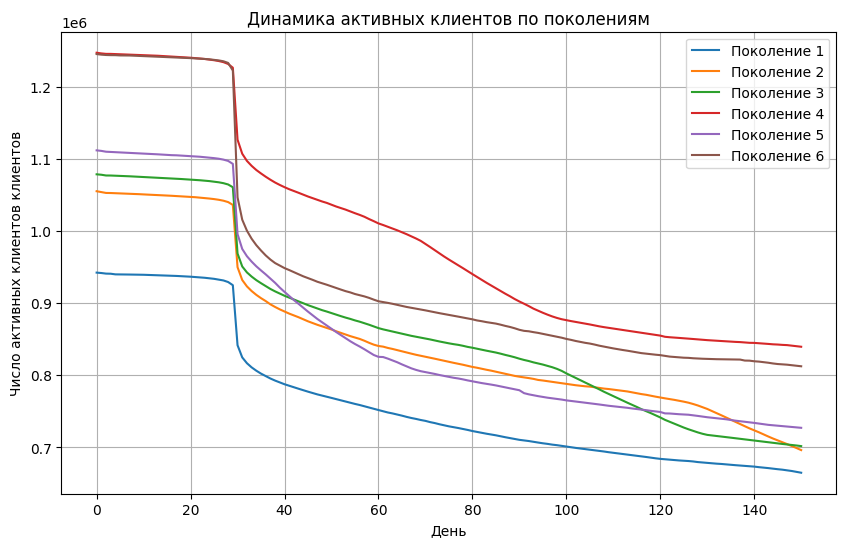

In [19]:
cohorts = [1, 2, 3, 4, 5, 6]

cohort_dynamics = {}


for cohort in cohorts:
    cohort_df = cohort_data.get_group(cohort)
    cohort_dynamics[cohort] = cohort_df[['день', 'кол-во активных клиентов']]





plt.figure(figsize=(10, 6))

for cohort, data in cohort_dynamics.items():
    plt.plot(data['день'], data['кол-во активных клиентов'], label=f'Поколение {cohort}')

plt.title('Динамика активных клиентов по поколениям')
plt.xlabel('День')
plt.ylabel('Число активных клиентов клиентов')
plt.legend()
plt.grid(True)
plt.show()

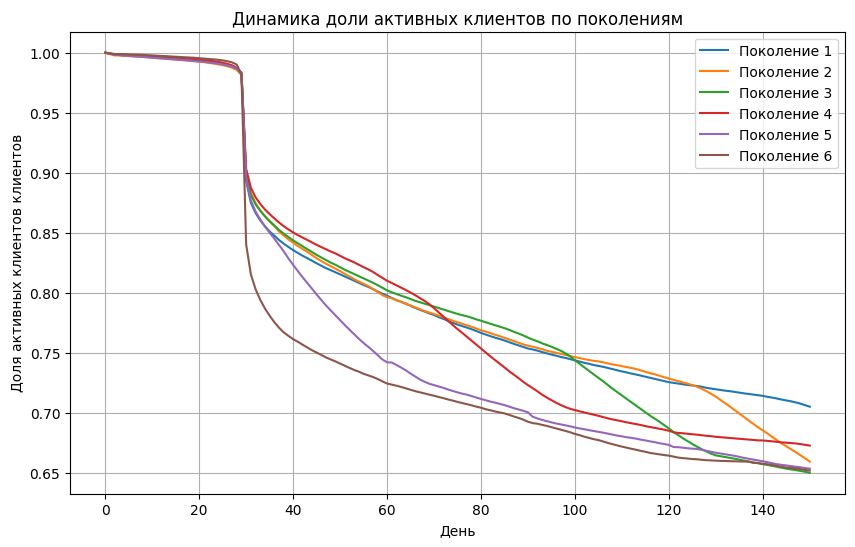

In [20]:
cohort_dynamics_part={}

for cohort in cohorts:
    cohort_df = cohort_data.get_group(cohort)
    cohort_dynamics_part[cohort] = cohort_df[['день', 'Доля активных клиентов']]



plt.figure(figsize=(10, 6))

for cohort, data in cohort_dynamics_part.items():
    plt.plot(data['день'], data['Доля активных клиентов'], label=f'Поколение {cohort}')

plt.title('Динамика доли активных клиентов по поколениям')
plt.xlabel('День')
plt.ylabel('Доля активных клиентов клиентов')
plt.legend()
plt.grid(True)
plt.show()

Задание 2


In [21]:
report_date = pd.to_datetime('21.05.2024', format='%d.%m.%Y')

# Фильтрация данных по дате отчета
df_filtered = df[df['месяц открытия счёта'] + pd.to_timedelta(df['день'], unit='d') <= report_date]
df_filtered


,месяц открытия счёта,день,кол-во активных клиентов,Поколение,Доля активных клиентов
0,2024-01-01,0,942583.8,1,1.000000
1,2024-01-01,1,942028.7,1,0.999411
2,2024-01-01,2,941213.6,1,0.998546
3,2024-01-01,3,941039.4,1,0.998362
4,2024-01-01,4,940161.9,1,0.997431
...,...,...,...,...,...
620,2024-05-01,16,1105583.0,5,0.993995
621,2024-05-01,17,1105399.7,5,0.993830
622,2024-05-01,18,1105029.2,5,0.993497
623,2024-05-01,19,1104648.3,5,0.993154


In [22]:
cohort_data = df_filtered.groupby('Поколение')

# Подсчет оставшихся клиентов на дату отчета для каждого поколения
cohort_counts = cohort_data['кол-во активных клиентов'].last()

# Вычисление доли каждого поколения от всех клиентов
total_clients = cohort_counts.sum()
cohort_shares = (cohort_counts / total_clients) * 100

print("Разбивка базы по поколениям на 21.05.2024: (в процентах)")
print(cohort_shares.to_string(header=False))

Разбивка базы по поколениям на 21.05.2024: (в процентах)
1    15.180284
2    17.607955
3    18.889171
4    23.400288
5    24.922303


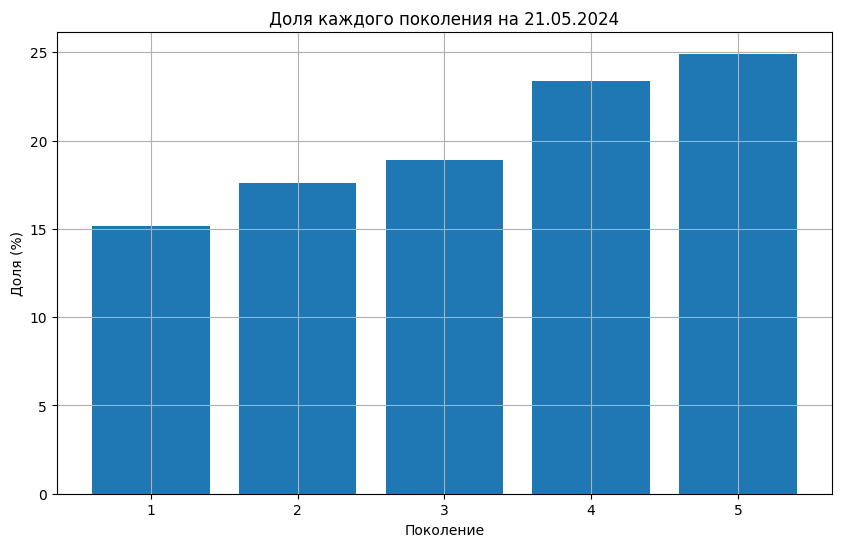

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(cohort_shares.index, cohort_shares.values)
plt.title('Доля каждого поколения на 21.05.2024')
plt.xlabel('Поколение')
plt.ylabel('Доля (%)')
plt.grid(True)
plt.show()

Задание 3

In [24]:
cohort_30 = {}
cohort_150 = {}

for cohort in cohorts:
    cohort_df = cohort_dynamics[cohort]
    cohort_30[cohort] = cohort_df[cohort_df['день'] == 30]['кол-во активных клиентов'].values[0]
    cohort_150[cohort] = cohort_df[cohort_df['день'] == 150]['кол-во активных клиентов'].values[0]


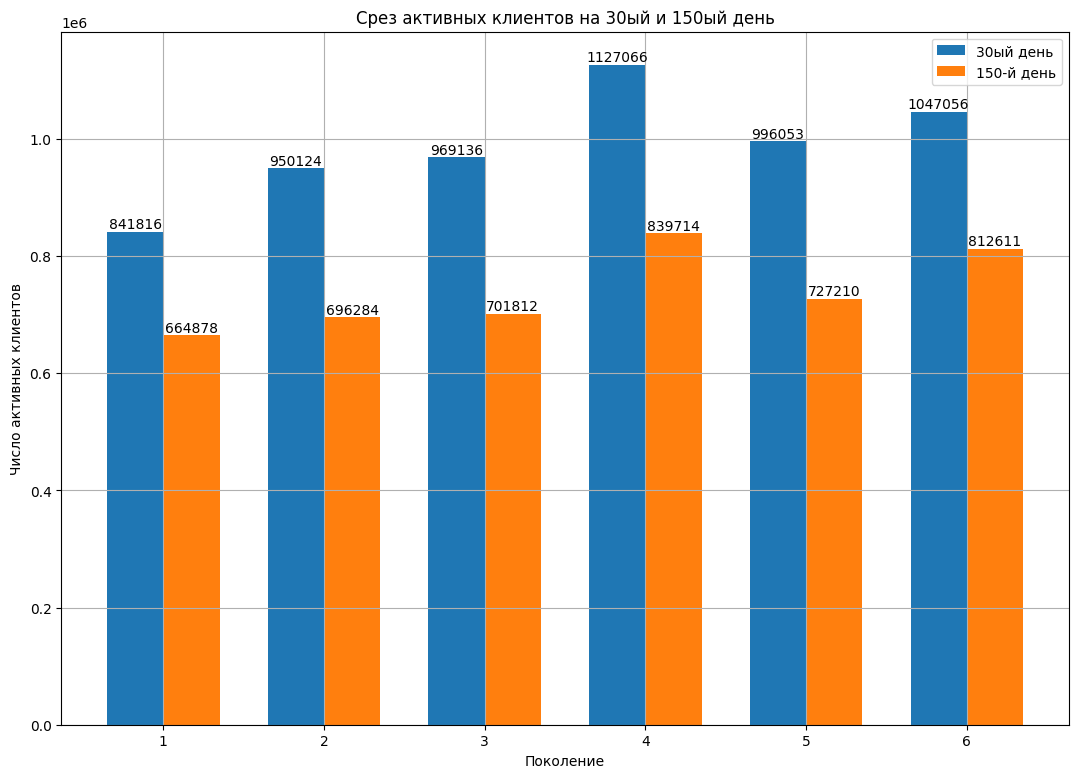

In [25]:
plt.figure(figsize=(13, 9))
bar_width = 0.35

# 30ый день
bars_30 = plt.bar(range(len(cohorts)), cohort_30.values(), bar_width, label='30ый день')
for bar in bars_30:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

# 150ый день
bars_150 = plt.bar([x + bar_width for x in range(len(cohorts))], cohort_150.values(), bar_width, label='150-й день')
for bar in bars_150:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

plt.xticks([x + bar_width / 2 for x in range(len(cohorts))], cohort_30.keys())
plt.xlabel('Поколение')
plt.ylabel('Число активных клиентов')
plt.legend()
plt.grid(True)
plt.title('Срез активных клиентов на 30ый и 150ый день')
plt.show()


In [26]:
worst_cohort_30 = min(cohort_30, key=cohort_30.get)

print(f"Наихудшая когорта на 30ый день: {worst_cohort_30}.")


if worst_cohort_30 == min(cohort_150, key=cohort_150.get):
    print("Картина сохраняется на 150ый день.")
else:
    print("Картина не сохраняется на 150ый день.")
    print(f"Наихудшая когорта на 150ый день: {min(cohort_150, key=cohort_150.get)}.")

Наихудшая когорта на 30ый день: 1.
Картина сохраняется на 150ый день.


Но это по числу пользователей! Их же не одинаковое число, поэтому смотрим на долю теперь.

In [27]:
cohort_30_part = {}
cohort_150_part = {}

for cohort in cohorts:
    cohort_df = cohort_dynamics_part[cohort]
    cohort_30_part[cohort] = cohort_df[cohort_df['день'] == 30]['Доля активных клиентов'].values[0]
    cohort_150_part[cohort] = cohort_df[cohort_df['день'] == 150]['Доля активных клиентов'].values[0]

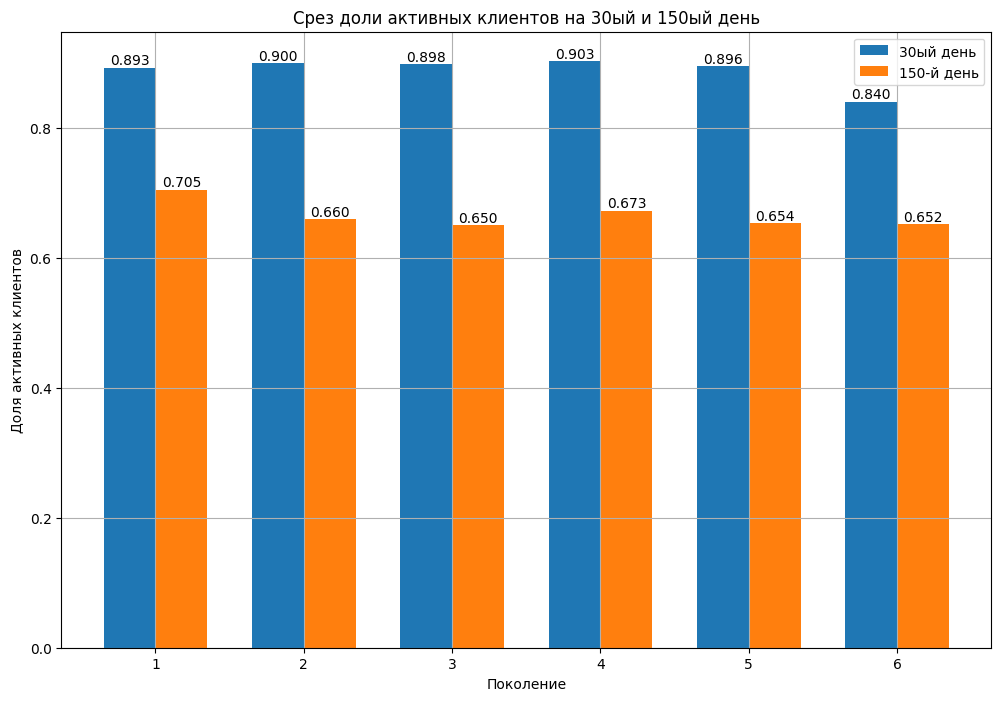

In [28]:
plt.figure(figsize=(12, 8))
bar_width = 0.35

# 30ый день
bars_30 = plt.bar(range(len(cohorts)), cohort_30_part.values(), bar_width, label='30ый день')
for bar in bars_30:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

# 150ый день
bars_150 = plt.bar([x + bar_width for x in range(len(cohorts))], cohort_150_part.values(), bar_width, label='150-й день')
for bar in bars_150:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

plt.xticks([x + bar_width / 2 for x in range(len(cohorts))], cohort_30_part.keys())
plt.xlabel('Поколение')
plt.ylabel('Доля активных клиентов')
plt.legend()
plt.grid(True)
plt.title('Срез доли активных клиентов на 30ый и 150ый день')
plt.show()

In [29]:
worst_cohort_30 = min(cohort_30_part, key=cohort_30_part.get)

print(f"Наихудшая когорта на 30ый день: {worst_cohort_30}.")


if worst_cohort_30 == min(cohort_150_part, key=cohort_150_part.get):
    print("Картина сохраняется на 150ый день.")
else:
    print("Картина не сохраняется на 150ый день.")
    print(f"Наихудшая когорта на 150ый день: {min(cohort_150_part, key=cohort_150_part.get)}.")

Наихудшая когорта на 30ый день: 6.
Картина не сохраняется на 150ый день.
Наихудшая когорта на 150ый день: 3.
